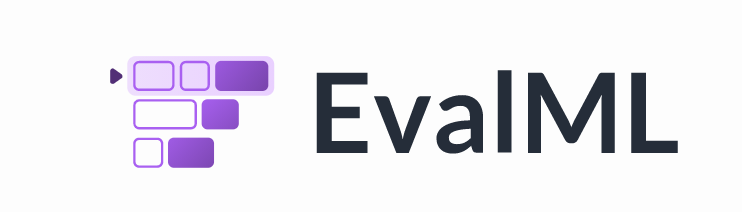

EvalML is an AutoML library which builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

#### Key Functionality

1. Automation - Makes machine learning easier. Avoid training and tuning models by hand. Includes data quality checks, cross-validation and more.

2. Data Checks - Catches and warns of problems with your data and problem setup before modeling.

3. End-to-end - Constructs and optimizes pipelines that include state-of-the-art preprocessing, feature engineering, feature selection, and a variety of modeling techniques.

4. Model Understanding - Provides tools to understand and introspect on models, to learn how they'll behave in your problem domain.

5. Domain-specific - Includes repository of domain-specific objective functions and an interface to define your own.

## Installing Libraries

In [ ]:
!pip install evalml

### Loading The Dataset
- We can also read the dataset from csv
- then convert to datatable

In [ ]:
import evalml
X, y = evalml.demos.load_breast_cancer()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')

In [ ]:
X_train.head()

### Running the AutoML to select the best algorithm

In [29]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [56]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: xgboost, extra_trees, lightgbm, random_forest, catboost, decision_tree, linear_model



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 12.904
Batch 1: (2/9) Decision Tree Classifier w/ Imputer      Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 2.432
High coefficient of variation (cv >= 0.2) within cross validation scores. Decision Tree Classifier w/ Imputer may not perform as estimated on unseen data.
Batch 1: (3/9) LightGBM Classifier w/ Imputer           Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.133
Batch 1: (4/9) Extra Trees Classifier w/ Imputer        Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.137
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + S... Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.506
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:02
	Sta

In [57]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,8,Logistic Regression Classifier w/ Imputer + St...,0.094015,0.060529,99.271446,True,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Imputer,0.113098,0.069048,99.123568,True,{'Imputer': {'categorical_impute_strategy': 'm...
2,7,Random Forest Classifier w/ Imputer,0.119972,0.099614,99.070299,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,LightGBM Classifier w/ Imputer,0.132722,0.110679,98.971496,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,3,Extra Trees Classifier w/ Imputer,0.136959,0.111169,98.938661,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,CatBoost Classifier w/ Imputer,0.386387,0.374338,97.005774,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,Elastic Net Classifier w/ Imputer + Standard S...,0.505862,0.496767,96.079926,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer,2.431916,2.726782,81.154350,True,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,12.904388,12.952041,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


### Getting The Best Pipeline

In [58]:
automl.best_pipeline

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Logistic Regression Classifier':{'penalty': 'l2', 'C': 1.0, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'lbfgs'},})

In [59]:
best_pipeline=automl.best_pipeline

### Let's Check the detailed desscription

In [60]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

***************************************************************
* Logistic Regression Classifier w/ Imputer + Standard Scaler *
***************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Training for binary problems.
Total training time (including CV): 3.4 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.061       0.958 0.997      0.966 0.974                     0.981            0.980                           0.412    303.000      152.000
1 

In [61]:
### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9933862433862434),
             ('F1', 0.963855421686747),
             ('Precision', 0.975609756097561),
             ('Recall', 0.9523809523809523)])

### We can also optimize for a problem specific objective

In [62]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: xgboost, extra_trees, lightgbm, random_forest, catboost, decision_tree, linear_model



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean AUC: 0.500
Batch 1: (2/9) Decision Tree Classifier w/ Imputer      Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean AUC: 0.923
Batch 1: (3/9) LightGBM Classifier w/ Imputer           Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 1: (4/9) Extra Trees Classifier w/ Imputer        Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean AUC: 0.993
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + S... Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean AUC: 0.985
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 1: (7/9) XGBoost Classifier w/ Imputer            Elapsed:00:03
	Starting cross validation
	Finished cross validation - mean AUC: 0.991
Batch 

In [63]:
automl_auc.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Imputer,0.992791,0.995753,49.279119,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,7,Random Forest Classifier w/ Imputer,0.992482,0.994367,49.248175,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,Logistic Regression Classifier w/ Imputer + St...,0.991342,0.996676,49.134239,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,CatBoost Classifier w/ Imputer,0.991305,0.993906,49.130502,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.991265,0.995568,49.126544,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,LightGBM Classifier w/ Imputer,0.990700,0.991505,49.070044,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,Elastic Net Classifier w/ Imputer + Standard S...,0.984943,0.996861,48.494262,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer,0.923371,0.919298,42.337093,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0.500000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [66]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 0.9 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.996 0.964      0.982    303.000      152.000
1           0.994 0.914      1.000    303.000      152.000
2           0.988 0.927      0.944    304.000      151.000
mean        0.993 0.935      0.975          -            -
std         0.004 0.026      0.028          -            -
coef of var 0.004 0

In [67]:
best_pipeline_auc = automl_auc.best_pipeline

In [68]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.986111111111111)])

In [69]:
best_pipeline.save("model.pkl")

#### Loading the Model

In [70]:
check_model=automl.load('model.pkl')

In [71]:
check_model.predict_proba(X_test).to_dataframe()

,benign,malignant
0,9.996252e-01,0.000375
1,9.845724e-01,0.015428
2,7.749595e-01,0.225040
3,9.907312e-01,0.009269
4,9.998272e-01,0.000173
...,...,...
109,9.990961e-01,0.000904
110,7.981366e-01,0.201863
111,9.999924e-01,0.000008
112,1.082727e-08,1.000000
